In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
n_samples =800
n_features =8
X,y =make_classification(n_samples, n_features, n_redundant=1, n_informative=6, n_clusters_per_class=2,random_state=4205)

In [3]:
print(X.shape)
print(y.shape)

(800, 8)
(800,)


In [4]:
X[0]

array([ 0.47426737,  3.2915114 ,  3.26119   ,  2.55204206, -0.11094905,
        3.18398662, -0.54505232, -0.1119242 ])

In [5]:
y[0]

0

PREPARE KFOLD

In [6]:
n_fold=5

X_fold = X.reshape((n_fold, -1, n_features))
y_fold = y.reshape((n_fold,-1))

print(X_fold.shape)
print(y_fold.shape)

(5, 160, 8)
(5, 160)


KNN

In [7]:
def euclidean(x1, x2):
    return np.linalg.norm(x1-x2, axis=1)

In [8]:
def predict(x, data_train, k, distance_fn):
    X, y        = data_train
    dist        = distance_fn(x, X)
    nearest_idx = dist.argsort()[:k]
    y_pred      = y[nearest_idx]
    y_pred      = np.bincount(y_pred).argmax()
    return y_pred

KFOLD

In [9]:
def accuracy(y, y_pred):
    acc = (y==y_pred).mean()
    return acc

In [10]:
k_observe = [1, 3, 5, 7]
acc_fold = []

for i in range(n_fold):

    X_val = X_fold[i]
    y_val = y_fold[i]

    X_train = np.delete(X_fold, i, 0)
    y_train = np.delete(y_fold, i, 0)

    X_train = X_train.reshape(-1, 8)
    y_train = y_train.reshape(-1,)

    data_train = (X_train, y_train)

    acc = []
    for k in k_observe:
        y_pred = []
        for x in X_val:
            y_hat = predict(x, data_train, k, euclidean)
            y_pred.append(y_hat)
        y_pred = np.array(y_pred)

        acc_k = accuracy(y_val, y_pred)
        print('fold=%d, k=%d, acc=%0.2f' % (i, k, acc_k))

        acc.append(acc_k)

    acc_fold.append(acc)

fold=0, k=1, acc=0.88
fold=0, k=3, acc=0.88
fold=0, k=5, acc=0.88
fold=0, k=7, acc=0.91
fold=1, k=1, acc=0.85
fold=1, k=3, acc=0.91
fold=1, k=5, acc=0.90
fold=1, k=7, acc=0.91
fold=2, k=1, acc=0.89
fold=2, k=3, acc=0.91
fold=2, k=5, acc=0.92
fold=2, k=7, acc=0.89
fold=3, k=1, acc=0.89
fold=3, k=3, acc=0.90
fold=3, k=5, acc=0.92
fold=3, k=7, acc=0.91
fold=4, k=1, acc=0.89
fold=4, k=3, acc=0.91
fold=4, k=5, acc=0.87
fold=4, k=7, acc=0.86


In [11]:
acc_fold = np.array(acc_fold)
acc_fold

array([[0.875  , 0.875  , 0.875  , 0.9125 ],
       [0.85   , 0.90625, 0.9    , 0.9125 ],
       [0.89375, 0.9125 , 0.91875, 0.89375],
       [0.89375, 0.9    , 0.91875, 0.9125 ],
       [0.89375, 0.90625, 0.86875, 0.8625 ]])

In [12]:
acc_mean = acc_fold.mean(axis=0)
acc_mean

array([0.88125, 0.9    , 0.89625, 0.89875])

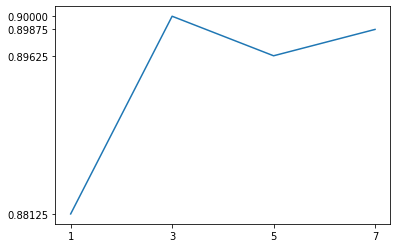

In [13]:
plt.plot(k_observe, acc_mean)
plt.xticks(k_observe)
plt.yticks(acc_mean)
plt.show()

PROFF

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
knn_csv = KNeighborsClassifier(algorithm='brute')
param_grid = {'n_neighbors' : k_observe}

In [16]:
knn_gscv = GridSearchCV(knn_csv, param_grid, cv=5)
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [17]:
knn_gscv.best_params_

{'n_neighbors': 3}

In [18]:
print(knn_gscv.cv_results_['split0_test_score'])
print(acc_fold[0])

[0.875   0.875   0.875   0.91875]
[0.875  0.875  0.875  0.9125]


In [19]:
print(knn_gscv.cv_results_['mean_test_score'])
print(acc_mean)

[0.88375 0.89875 0.89625 0.89875]
[0.88125 0.9     0.89625 0.89875]
